In [1]:
from sklearn import preprocessing
from sklearn.externals import joblib
import sklearn as skl
from sklearn import tree
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
%matplotlib inline
import time
import warnings
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

C:\Users\rodelga\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data_root_dir = r'D:\CIC\Train and Test\Filter 40 - DT'
# Load all the training and testing data
X_train = pd.read_pickle(f'{data_root_dir}\X_train.pkl')
X_test = pd.read_pickle(f'{data_root_dir}\X_test.pkl')
y_test = pd.read_pickle(f'{data_root_dir}\y_test.pkl')
y_train = pd.read_pickle(f'{data_root_dir}\y_train.pkl')

In [3]:
# Timer to see how long it takes to test the algorithm
startTime = time.perf_counter()

rf_classifier = RandomForestClassifier(n_estimators = 10, random_state = 10, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = rf_classifier.predict(X_test)

rf_results = confusion_matrix(y_test, y_pred_rf)
rf_error = zero_one_loss(y_test, y_pred_rf)
rf_score = accuracy_score(y_test, y_pred_rf) * 100
rf_report = classification_report(y_test, y_pred_rf)

# Print endTime - startTime to calculate how long it takes
endTime = time.perf_counter()

In [4]:
print(f"Total time: {endTime - startTime:0.4f} seconds \n")
print("Decision Tree Classifier Results")
print("=================================================")
print(f"Confusion Matrix:")
print(f"{rf_results[0]}")
print(f"{rf_results[1]} \n")

print("Report :")
print(rf_report) 

print(f"True Postive   : {rf_results[0][0]}")
print(f"False Positive : {rf_results[0][1]}")
print(f"False Negative : {rf_results[1][0]}")
print(f"True Negative  : {rf_results[1][1]}")
print(f"Error Value    : {rf_error}")
print(f"Accuracy_Score : {rf_score}")
print("=================================================")

Total time: 581.0541 seconds 

Decision Tree Classifier Results
Confusion Matrix:
[4003723   12947]
[ 44256 780247] 

Report :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99   4016670
           1       0.98      0.95      0.96    824503

    accuracy                           0.99   4841173
   macro avg       0.99      0.97      0.98   4841173
weighted avg       0.99      0.99      0.99   4841173

True Postive   : 4003723
False Positive : 12947
False Negative : 44256
True Negative  : 780247
Error Value    : 0.011815937996844994
Accuracy_Score : 98.81840620031551


In [5]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_test.columns)
print('Feature importances sorted:')
print('---------------------------------')
feature_importances.nlargest(50)

Feature importances sorted:
---------------------------------


Fwd Pkt Len Mean     0.108704
Init Fwd Win Byts    0.084628
Fwd Seg Size Min     0.082507
Fwd Pkts/s           0.073986
Dst Port             0.068034
Fwd Pkt Len Max      0.062275
Init Bwd Win Byts    0.040266
Fwd IAT Mean         0.039932
Fwd IAT Tot          0.038149
Flow Byts/s          0.035872
Fwd IAT Max          0.035204
Flow IAT Mean        0.031157
Flow IAT Min         0.029977
Flow IAT Max         0.028557
Subflow Fwd Pkts     0.027051
Fwd IAT Std          0.022942
Fwd Header Len       0.019134
Fwd IAT Min          0.018463
ACK Flag Cnt         0.018141
TotLen Fwd Pkts      0.017814
Bwd Header Len       0.016385
Flow Pkts/s          0.015603
Flow Duration        0.014848
Bwd Seg Size Avg     0.010677
Bwd IAT Min          0.010378
Bwd IAT Tot          0.009646
Bwd Pkts/s           0.008144
Flow IAT Std         0.007174
Bwd Pkt Len Max      0.006316
Bwd IAT Std          0.002740
Bwd Pkt Len Mean     0.002549
Fwd Act Data Pkts    0.002316
URG Flag Cnt         0.002162
Bwd IAT Ma

Top 20 features:
---------------------------------
Fwd Pkt Len Mean     0.108704
Init Fwd Win Byts    0.084628
Fwd Seg Size Min     0.082507
Fwd Pkts/s           0.073986
Dst Port             0.068034
Fwd Pkt Len Max      0.062275
Init Bwd Win Byts    0.040266
Fwd IAT Mean         0.039932
Fwd IAT Tot          0.038149
Flow Byts/s          0.035872
Fwd IAT Max          0.035204
Flow IAT Mean        0.031157
Flow IAT Min         0.029977
Flow IAT Max         0.028557
Subflow Fwd Pkts     0.027051
Fwd IAT Std          0.022942
Fwd Header Len       0.019134
Fwd IAT Min          0.018463
ACK Flag Cnt         0.018141
TotLen Fwd Pkts      0.017814
dtype: float64


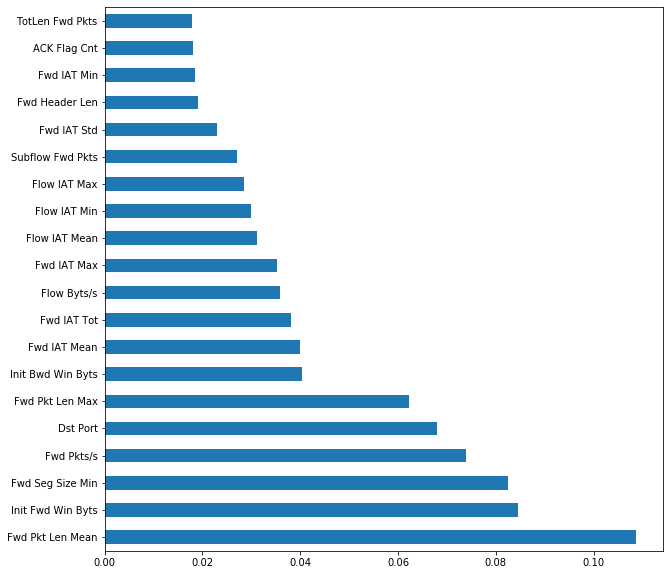

In [6]:
print('Top 20 features:')
print('---------------------------------')
feature_importances.nlargest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nlargest(20))

Least 20 features:
---------------------------------
FIN Flag Cnt         0.000355
Idle Max             0.000914
Idle Mean            0.000922
Idle Min             0.001128
PSH Flag Cnt         0.001480
Bwd IAT Mean         0.001601
Bwd IAT Max          0.001871
URG Flag Cnt         0.002162
Fwd Act Data Pkts    0.002316
Bwd Pkt Len Mean     0.002549
Bwd IAT Std          0.002740
Bwd Pkt Len Max      0.006316
Flow IAT Std         0.007174
Bwd Pkts/s           0.008144
Bwd IAT Tot          0.009646
Bwd IAT Min          0.010378
Bwd Seg Size Avg     0.010677
Flow Duration        0.014848
Flow Pkts/s          0.015603
Bwd Header Len       0.016385
dtype: float64


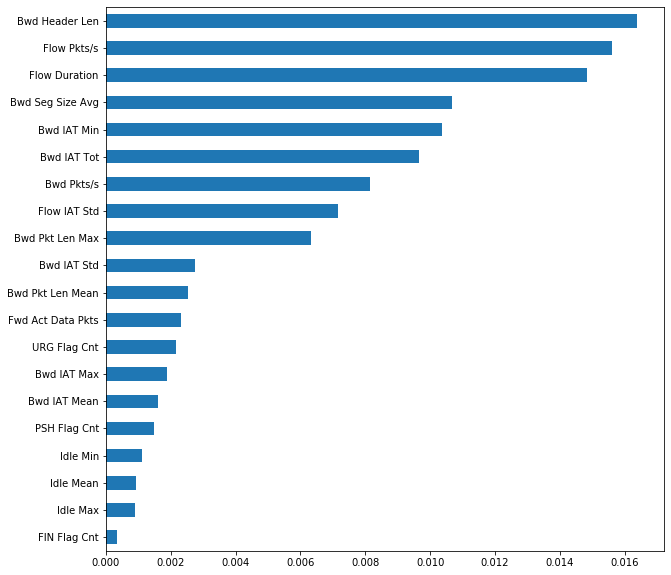

In [7]:
print('Least 20 features:')
print('---------------------------------')
feature_importances.nsmallest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nsmallest(20))